In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
analysis_subset = (pd.read_csv('../data/clean/analysis_subset.csv', low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
analysis_subset.shape

(11333, 253)

In [4]:
age_mask = (analysis_subset.age_test>=48) & (analysis_subset.age_test<60)

In [5]:
analysis_subset[age_mask].drop_duplicates(subset='student_idx').shape

(463, 253)

In [6]:
data_4yo = analysis_subset[age_mask].drop_duplicates(subset='student_idx').copy()

## Demographics

In [7]:
data_4yo.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      246
Female    217
Name: male, dtype: int64

In [8]:
data_4yo.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       304
Black        52
Hispanic     46
Other        38
Asian        23
Name: race, dtype: int64

In [9]:
data_4yo.premature.replace({True: '>=36 weeks', False: '<36 weeks', np.nan: 'Unknown'}).value_counts()

<36 weeks     346
>=36 weeks     60
Unknown        57
Name: premature, dtype: int64

In [10]:
data_4yo.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          105
2          189
3           98
4+          55
Missing     16
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

data_4yo.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    149
Some high school           118
Unknown                    101
Some college                84
8th grade or less           11
Name: mother_ed, dtype: int64

In [12]:
data_4yo.father_ed.replace(ed_lookup).value_counts()

Unknown                    131
Bachelor's degree          117
Some college                75
Post graduate degree        74
High school diploma/GED     57
Some high school             9
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

data_4yo.family_inv.replace(family_lookup).value_counts()

Ideal Participation      152
Good Participation       109
Average Participation    105
Missing                   53
Below Average             34
Limited Participation     10
Name: family_inv, dtype: int64

In [14]:
data_4yo[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,407.000000,402.000000,371.000000,463.000000
mean,9.259214,13.915423,15.185984,24.095032
std,12.830546,13.714685,13.714873,16.624827
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.000000,9.000000
50%,2.000000,8.000000,12.000000,22.000000
75%,15.500000,22.000000,24.000000,36.000000
max,54.000000,65.000000,60.000000,88.000000


In [15]:
data_4yo.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION only         222
Missing              64
OPTION + outside     60
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
data_4yo.degree_hl_ad.isnull().sum()

20

In [17]:
data_4yo.degree_hl_as.isnull().sum()

19

In [18]:
data_4yo.degree_hl_ad.value_counts()

6.0    190
4.0     74
5.0     70
3.0     60
2.0     29
0.0     11
1.0      9
Name: degree_hl_ad, dtype: int64

In [19]:
data_4yo.degree_hl_as.value_counts()

6.0    191
4.0     78
5.0     65
3.0     61
2.0     22
0.0     16
1.0     11
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = data_4yo.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
data_4yo.one_or_both_parent_hl.value_counts()

0.0    380
1.0     28
Name: one_or_both_parent_hl, dtype: int64

In [22]:
data_4yo.one_or_both_parent_hl.isnull().sum()

55

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['1045-2010-0056', '0938-2014-0019', '0414-2016-0001',
       '0414-2015-0025', '0414-2016-0027', '0414-2016-0025',
       '0414-2016-0014', '0414-2015-0017', '0411-2014-0023',
       '0411-2014-0030', '0414-2017-0025', '0411-2015-0045',
       '0411-2014-0004', '0205-2015-0005', '0938-2010-0017',
       '0938-2009-0013', '0414-2013-0288', '0414-2013-0278',
       '0519-2014-0081'], dtype=object)

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      345
bilateral_cond       22
assymetrical         17
bilateral_ansd       17
unilateral_snhl      14
bilateral_mixed      12
unilateral_cond      10
bilateral_normal      3
unilateral_mixed      2
unilateral_ansd       2
unilateral_unk        0
bilateral_unk         0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.75
bilateral_cond      0.05
assymetrical        0.04
bilateral_ansd      0.04
unilateral_snhl     0.03
bilateral_mixed     0.03
unilateral_cond     0.02
bilateral_normal    0.01
unilateral_unk      0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
bilateral_unk       0.00
dtype: float64

In [26]:
tech_data = data_4yo.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        317
bilateral_ha         91
bimodal              34
unilateral_ha         9
unilateral_ci         8
bilateral_other       1
unilateral_other      0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.68
bilateral_ha        0.20
bimodal             0.07
unilateral_ci       0.02
unilateral_ha       0.02
unilateral_other    0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array(['0523-2015-0002', '0414-2012-0224', '0205-2015-0008'], dtype=object)

## Hearing Loss

In [30]:
data_4yo.columns[data_4yo.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound', 'deg_hl_below6'],
      dtype='object')

In [31]:
hl_data = data_4yo.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     159
bilateral_hl_modsev        48
bilateral_hl_moderate      41
bilateral_hl_severe        37
bilateral_hl_mild          16
unilateral_hl_profound      7
unilateral_hl_modsev        7
unilateral_hl_severe        5
unilateral_hl_mild          4
bilateral_hl_slight         4
unilateral_hl_moderate      1
unilateral_hl_slight        1
bilateral_hl_normal         0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.34
bilateral_hl_modsev       0.10
bilateral_hl_moderate     0.09
bilateral_hl_severe       0.08
bilateral_hl_mild         0.03
unilateral_hl_profound    0.02
unilateral_hl_modsev      0.02
unilateral_hl_severe      0.01
unilateral_hl_mild        0.01
bilateral_hl_slight       0.01
unilateral_hl_moderate    0.00
unilateral_hl_slight      0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(data_4yo[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

21

## Summary of scores by domain

In [35]:
test_scores = analysis_subset[age_mask].copy()

In [36]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [37]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,298.0,86.4,19.9,0.0,74.2,88.0,101.0,121.0
Expressive Language,419.0,87.8,19.6,45.0,73.0,87.0,102.0,136.0
Expressive Vocabulary,412.0,97.5,20.5,0.0,85.0,98.5,112.2,140.0
Language,428.0,89.9,20.7,48.0,75.0,90.0,106.0,163.0
Receptive Language,417.0,91.6,19.1,50.0,79.0,92.0,107.0,145.0
Receptive Vocabulary,415.0,95.8,18.5,0.0,83.5,98.0,109.0,137.0


In [38]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [39]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

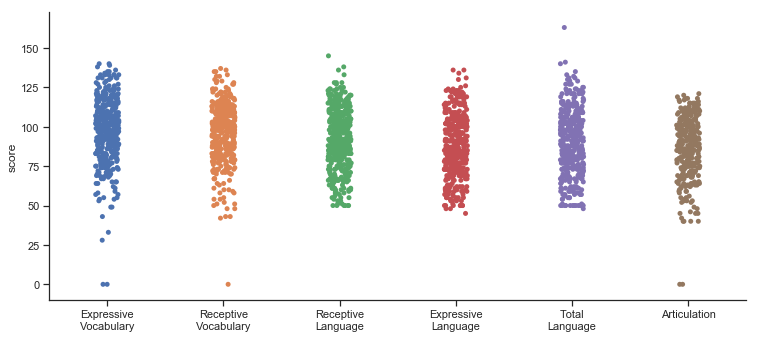

In [40]:
sns.catplot("domain_labels", y="score", data=test_scores)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

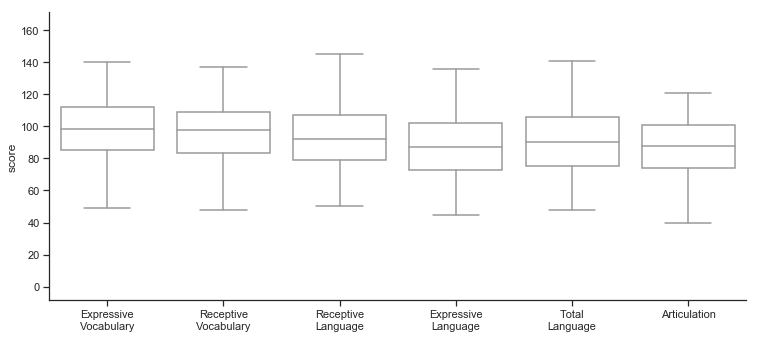

In [41]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [42]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False              157.0  91.681529  17.812067  45.0   
                      True               141.0  80.503546  20.592864   0.0   
Expressive Language   False              226.0  91.747788  18.537964  50.0   
                      True               193.0  83.191710  19.952014  45.0   
Expressive Vocabulary False              225.0  99.466667  17.960025  28.0   
                      True               187.0  95.090909  23.001105   0.0   
Language              False              228.0  93.008772  18.752267  50.0   
                      True               200.0  86.250000  22.206828  48.0   
Receptive Language    False              226.0  94.194690  17.337106  53.0   
                      True               191.0  88.502618  20.636420  50.0   
Receptive Vocabulary  False              226.0  98.110619  17.136606  43.0   
                      True               189.0  93.063492  19.683836   0.0   

                                           25%    50%    75%    max  
domain                age_amp_greater_6                              
Articulation          False              80.00   95.0  106.0  121.0  
                      True               69.00   83.0   95.0  118.0  
Expressive Language   False              77.50   92.0  105.0  136.0  
                      True               69.00   81.0   98.0  134.0  
Expressive Vocabulary False              89.00  101.0  112.0  140.0  
                      True               83.00   94.0  112.5  140.0  
Language              False              79.75   94.0  106.0  141.0  
                      True               69.00   85.0  102.0  163.0  
Receptive Language    False              83.00   94.0  108.0  128.0  
                      True               71.00   88.0  105.0  145.0  
Receptive Vocabulary  False              87.25   99.5  110.0  137.0  
                      True               81.00   94.0  109.0  132.0

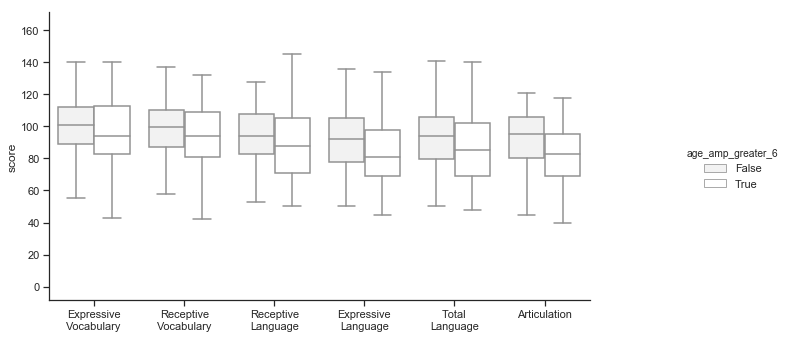

In [43]:
sns.catplot("domain_labels", y="score", hue='age_amp_greater_6', data=test_scores.assign(age_amp_greater_6=test_scores.age_amp>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Age of enrollment greater than 6mo.

In [44]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                 152.0  88.914474  21.140008   0.0   
                      True                  146.0  83.767123  18.324674  40.0   
Expressive Language   False                 214.0  90.037383  19.852709  48.0   
                      True                  205.0  85.478049  19.205947  45.0   
Expressive Vocabulary False                 213.0  99.187793  20.937067   0.0   
                      True                  199.0  95.653266  19.898109   0.0   
Language              False                 217.0  91.751152  20.353651  48.0   
                      True                  211.0  87.895735  20.902689  50.0   
Receptive Language    False                 213.0  93.530516  19.047985  50.0   
                      True                  204.0  89.558824  19.006648  50.0   
Receptive Vocabulary  False                 213.0  96.591549  19.805596   0.0   
                      True                  202.0  94.990099  17.003362  42.0   

                                              25%    50%     75%    max  
domain                age_enroll_greater_6                               
Articulation          False                 77.75   92.5  104.25  120.0  
                      True                  72.00   84.0   97.00  121.0  
Expressive Language   False                 75.00   91.0  104.00  136.0  
                      True                  71.00   85.0  100.00  134.0  
Expressive Vocabulary False                 87.00  101.0  114.00  140.0  
                      True                  83.00   96.0  109.00  139.0  
Language              False                 77.00   94.0  106.00  141.0  
                      True                  73.00   88.0  102.50  163.0  
Receptive Language    False                 81.00   94.0  108.00  136.0  
                      True                  73.75   90.0  104.25  145.0  
Receptive Vocabulary  False                 85.00   99.0  110.00  137.0  
                      True                  83.00   97.0  109.00  133.0

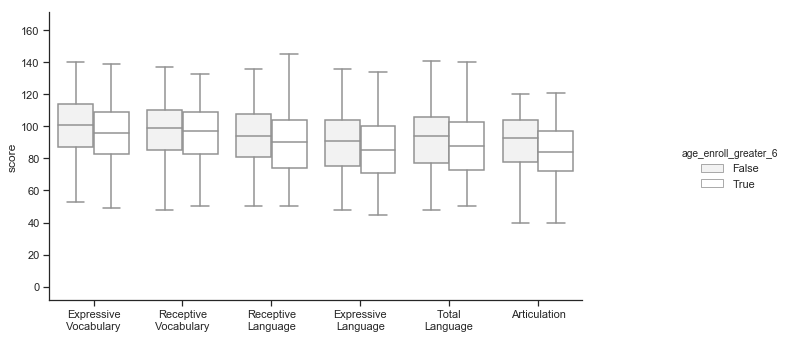

In [45]:
sns.catplot("domain_labels", y="score", hue='age_enroll_greater_6', data=test_scores.assign(age_enroll_greater_6=test_scores.age_int>6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

(Non-)Profound hearing loss

In [46]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count        mean        std   min    25%  \
domain                profound_hl                                              
Articulation          False        147.0   88.414966  18.276733  42.0  75.00   
                      True         151.0   84.423841  21.321175   0.0  73.50   
Expressive Language   False        208.0   92.759615  18.681927  45.0  79.75   
                      True         211.0   82.924171  19.395236  48.0  69.00   
Expressive Vocabulary False        207.0  100.362319  19.175205   0.0  90.00   
                      True         205.0   94.570732  21.398899   0.0  83.00   
Language              False        215.0   95.516279  19.545501  50.0  81.00   
                      True         213.0   84.131455  20.281547  48.0  69.00   
Receptive Language    False        207.0   96.758454  17.758893  50.0  85.00   
                      True         210.0   86.490476  19.061532  50.0  72.00   
Receptive Vocabulary  False        217.0   98.843318  16.493640  54.0  87.00   
                      True         198.0   92.489899  19.974283   0.0  81.25   

                                     50%    75%    max  
domain                profound_hl                       
Articulation          False         88.0  103.0  120.0  
                      True          88.0  100.0  121.0  
Expressive Language   False         93.0  107.0  136.0  
                      True          81.0   98.0  131.0  
Expressive Vocabulary False        102.0  113.5  140.0  
                      True          96.0  109.0  140.0  
Language              False         96.0  109.0  163.0  
                      True          82.0  100.0  135.0  
Receptive Language    False         98.0  109.5  145.0  
                      True          86.0  101.0  133.0  
Receptive Vocabulary  False        101.0  110.0  137.0  
                      True          92.0  108.0  133.0

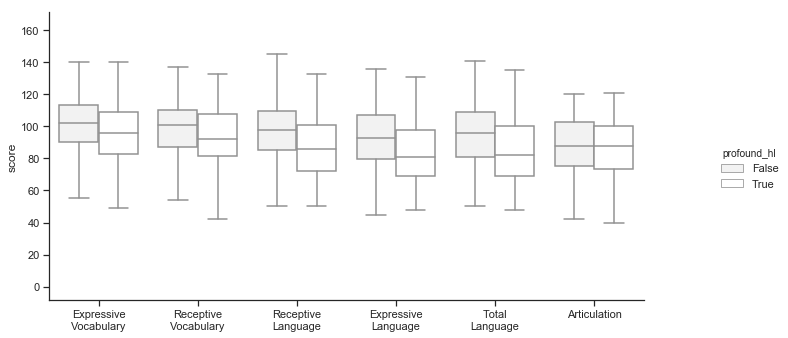

In [47]:
sns.catplot("domain_labels", y="score", hue='profound_hl', data=test_scores.assign(profound_hl=test_scores.degree_hl==6),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Parent with(out) hearing loss

In [48]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False           283.0  86.593640  19.965419   0.0   
                      True             15.0  82.600000  19.834314  40.0   
Expressive Language   False           392.0  87.696429  19.510957  45.0   
                      True             27.0  89.407407  21.888281  53.0   
Expressive Vocabulary False           388.0  97.432990  20.675496   0.0   
                      True             24.0  98.250000  17.649363  58.0   
Language              False           402.0  89.843284  20.643701  48.0   
                      True             26.0  89.961538  21.849450  50.0   
Receptive Language    False           391.0  91.662404  19.076865  50.0   
                      True             26.0  90.461538  19.930340  51.0   
Receptive Vocabulary  False           390.0  95.717949  18.542176   0.0   
                      True             25.0  97.280000  17.954851  64.0   

                                        25%    50%     75%    max  
domain                parent_with_hl                               
Articulation          False           74.50   88.0  101.00  121.0  
                      True            72.00   85.0   99.00  110.0  
Expressive Language   False           73.00   87.0  102.00  136.0  
                      True            74.00   88.0  107.00  131.0  
Expressive Vocabulary False           85.00   98.0  112.00  140.0  
                      True            85.25  102.5  113.00  124.0  
Language              False           75.00   90.0  105.50  163.0  
                      True            71.25   90.5  109.00  127.0  
Receptive Language    False           79.00   92.0  107.00  145.0  
                      True            75.50   92.0  106.25  124.0  
Receptive Vocabulary  False           83.25   98.0  109.00  137.0  
                      True            86.00   97.0  111.00  124.0

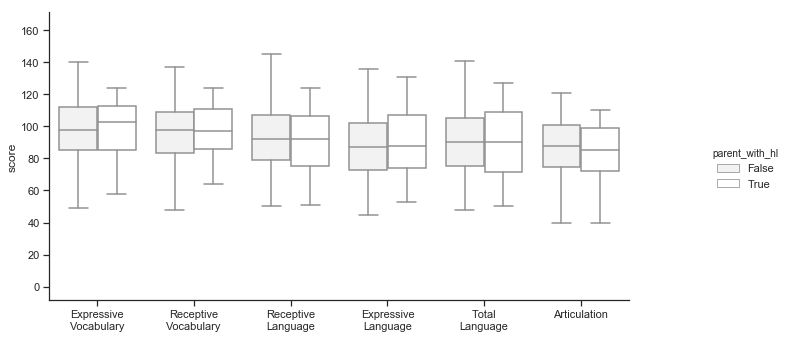

In [49]:
sns.catplot("domain_labels", y="score", hue='parent_with_hl', 
            data=test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss'])),
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

Mother with(out) college education

In [50]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count        mean        std   min  \
domain                mother_college                                       
Articulation          0               157.0   83.235669  20.035590   0.0   
                      1               141.0   89.907801  19.312431   0.0   
Expressive Language   0               207.0   80.710145  18.209489  48.0   
                      1               212.0   94.735849  18.532053  45.0   
Expressive Vocabulary 0               192.0   91.546875  19.999421   0.0   
                      1               220.0  102.659091  19.533069   0.0   
Language              0               208.0   81.879808  19.300822  48.0   
                      1               220.0   97.386364  19.113475  50.0   
Receptive Language    0               205.0   84.731707  18.804495  50.0   
                      1               212.0   98.216981  16.976150  50.0   
Receptive Vocabulary  0               195.0   89.374359  18.221669   0.0   
                      1               220.0  101.518182  16.809288  42.0   

                                        25%    50%     75%    max  
domain                mother_college                               
Articulation          0               69.00   85.0   99.00  118.0  
                      1               80.00   91.0  104.00  121.0  
Expressive Language   0               67.00   79.0   93.00  123.0  
                      1               83.00   96.0  107.25  136.0  
Expressive Vocabulary 0               80.00   93.5  106.00  138.0  
                      1               91.75  103.0  117.00  140.0  
Language              0               68.00   81.0   96.00  130.0  
                      1               83.75   99.0  110.00  163.0  
Receptive Language    0               70.00   85.0   98.00  138.0  
                      1               87.00  100.0  111.00  145.0  
Receptive Vocabulary  0               78.00   89.0  103.50  128.0  
                      1               90.00  102.0  113.25  137.0

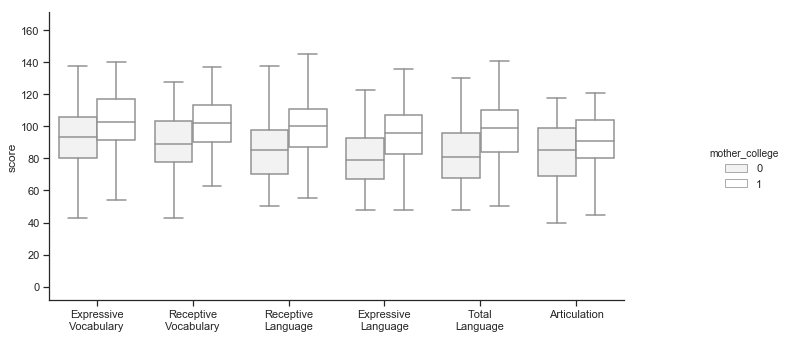

In [51]:
sns.catplot("domain_labels", y="score", hue='mother_college', data=test_scores,
            kind="box", color='white', fliersize=0)
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');